In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Hospital visits by state

In [3]:
er_hospital_states = pd.read_excel('DOSE_dx_Dashboard_011325.xlsx',sheet_name='Jurisdiction Counts & Rates')
er_hospital_states

,jurisdiction,month,year,time_frame,dataset,count_alldrug,count_opioid,count_fentanyl,count_heroin,count_stimulant,...,count_benzodiazepine,population,rate_alldrug,rate_opioid,rate_fentanyl,rate_heroin,rate_stimulant,rate_cocaine,rate_methamphetamine,rate_benzodiazepine
0,AK,all,2018,annual,ED,792,230,NaN,135,48,...,44,736624,107.5,31.2,NaN,18.3,6.5,suppressed,NaN,6
1,AK,all,2018,annual,HOSP,335,107,NaN,27,53,...,26,736624,45.5,14.5,NaN,3.7,7.2,suppressed,NaN,3.5
2,AK,all,2019,annual,ED,768,249,NaN,126,44,...,27,733603,104.7,33.9,NaN,17.2,6,suppressed,NaN,3.7
3,AK,all,2019,annual,HOSP,346,112,NaN,25,70,...,22,733603,47.2,15.3,NaN,3.4,9.5,suppressed,NaN,3
4,AK,all,2020,annual,ED,814,320,NaN,131,50,...,28,732964,111.1,43.7,NaN,17.9,6.8,suppressed,NaN,3.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5104,WI,12,2021,monthly,HOSP,153,70,11,19,27,...,14,5879978,2.6,1.2,suppressed,suppressed,0.5,suppressed,NaN,suppressed
5105,WI,12,2022,monthly,ED,562,227,13,95,20,...,37,5890543,9.5,3.9,suppressed,1.6,0.3,suppressed,suppressed,0.6
5106,WI,12,2022,monthly,HOSP,158,59,16,17,27,...,11,5890543,2.7,1,suppressed,suppressed,0.5,0.4,suppressed,suppressed
5107,WI,12,2023,monthly,ED,481,147,16,36,26,...,10,5910955,8.1,2.5,suppressed,0.6,0.4,suppressed,suppressed,suppressed


In [4]:
er_hospital_states['count_fentanyl'] = pd.to_numeric(er_hospital_states['count_fentanyl'], errors = 'coerce')
er_hospital_states['count_cocaine'] = pd.to_numeric(er_hospital_states['count_cocaine'], errors = 'coerce')
er_hospital_states['population'] = pd.to_numeric(er_hospital_states['population'], errors = 'coerce')

In [5]:
er_hospital_states.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5109 entries, 0 to 5108
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   jurisdiction           5109 non-null   object 
 1   month                  5109 non-null   object 
 2   year                   5109 non-null   int64  
 3   time_frame             5109 non-null   object 
 4   dataset                5109 non-null   object 
 5   count_alldrug          5109 non-null   int64  
 6   count_opioid           5109 non-null   object 
 7   count_fentanyl         2105 non-null   float64
 8   count_heroin           5109 non-null   object 
 9   count_stimulant        5109 non-null   object 
 10  count_cocaine          3445 non-null   float64
 11  count_methamphetamine  1056 non-null   object 
 12  count_benzodiazepine   5109 non-null   object 
 13  population             5109 non-null   int64  
 14  rate_alldrug           5109 non-null   object 
 15  rate

# How many annual inpatient hospitalizations vs emergency room? 

## Count ODs of per state from 2018 - 2023

### Emergency Dept nonfatal ODs 

In [9]:
yearly2018_2023ed = (
    er_hospital_states
    .loc[er_hospital_states['jurisdiction']!= 'US']
    .loc[er_hospital_states['month'] == 'all']
    .loc[er_hospital_states['dataset']=='ED']
    .groupby('jurisdiction')[['count_fentanyl','count_cocaine']].sum().reset_index()
)
yearly2018_2023ed

,jurisdiction,count_fentanyl,count_cocaine
0,AK,270.0,0.0
1,AZ,4800.0,482.0
2,CA,20393.0,4976.0
3,CO,2850.0,472.0
4,DC,66.0,114.0
5,FL,10026.0,5273.0
6,GA,1964.0,1449.0
7,HI,14.0,46.0
8,IA,161.0,109.0
9,IL,1125.0,1881.0


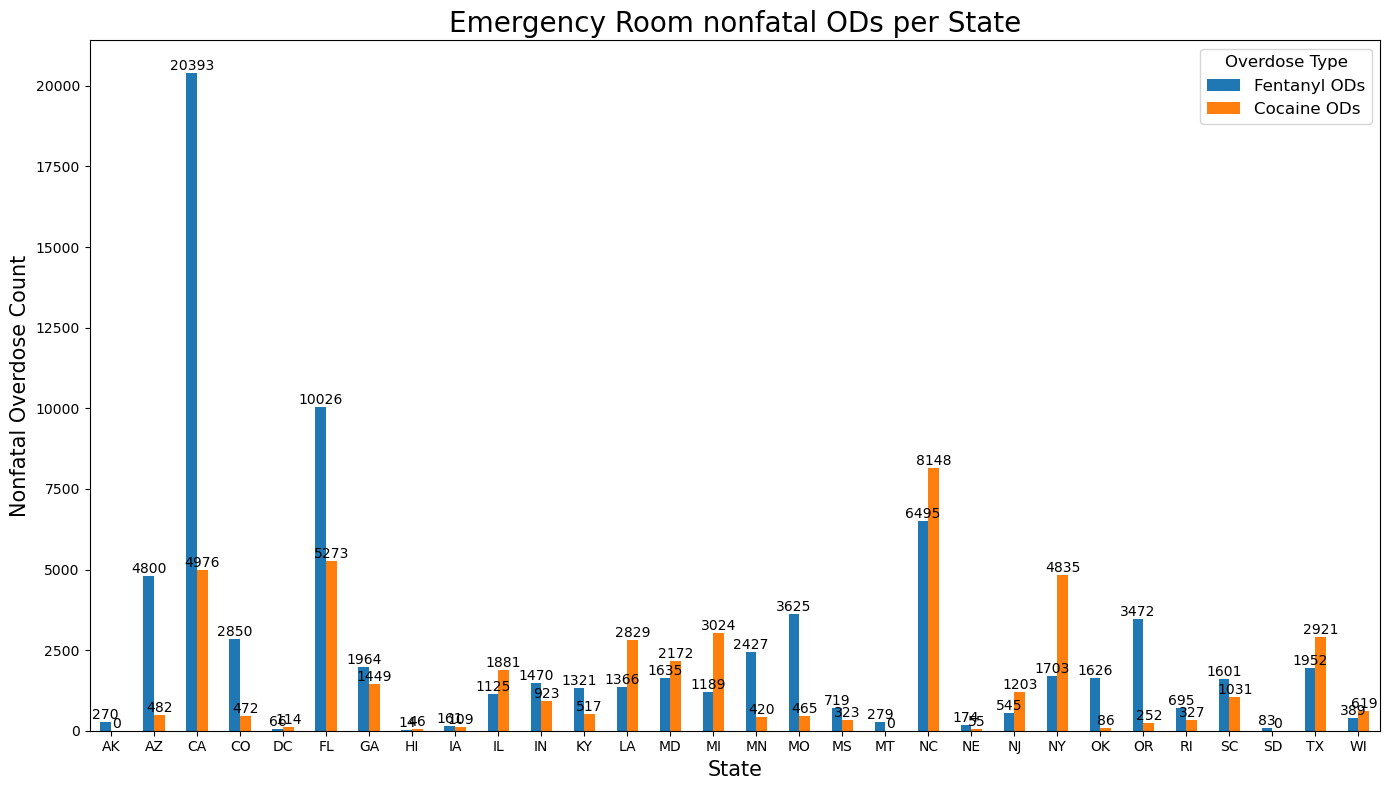

In [10]:

ax= yearly2018_2023ed.plot(x='jurisdiction',y=['count_fentanyl','count_cocaine'], kind='bar',figsize=(14, 8))

for container in ax.containers:
    ax.bar_label(container, label_type='edge')
    
plt.title('Emergency Room nonfatal ODs per State', fontsize=20)
plt.xlabel('State',fontsize=15)
plt.ylabel('Nonfatal Overdose Count',fontsize=15)
plt.xticks(rotation= 0)
plt.legend((['Fentanyl ODs','Cocaine ODs']), title='Overdose Type', title_fontsize=12, fontsize=12)
plt.tight_layout()

#plt.ylim(bottom=0, top=36000)

### Inpatient Hospitalizations nonfatal ODs 

In [12]:
yearly2018_2023hosp = (
    er_hospital_states
    .loc[er_hospital_states['jurisdiction']!= 'US']
    .loc[er_hospital_states['month'] == 'all']
    .loc[er_hospital_states['dataset']=='HOSP']
    .groupby('jurisdiction')[['count_fentanyl','count_cocaine']].sum().reset_index()
    
)
yearly2018_2023hosp

,jurisdiction,count_fentanyl,count_cocaine
0,AK,99.0,81.0
1,AZ,2376.0,876.0
2,CA,7477.0,7897.0
3,CO,747.0,912.0
4,DC,65.0,736.0
5,DE,357.0,591.0
6,FL,4386.0,14312.0
7,GA,1140.0,5752.0
8,HI,11.0,112.0
9,IA,45.0,136.0


(0.0, 20000.0)

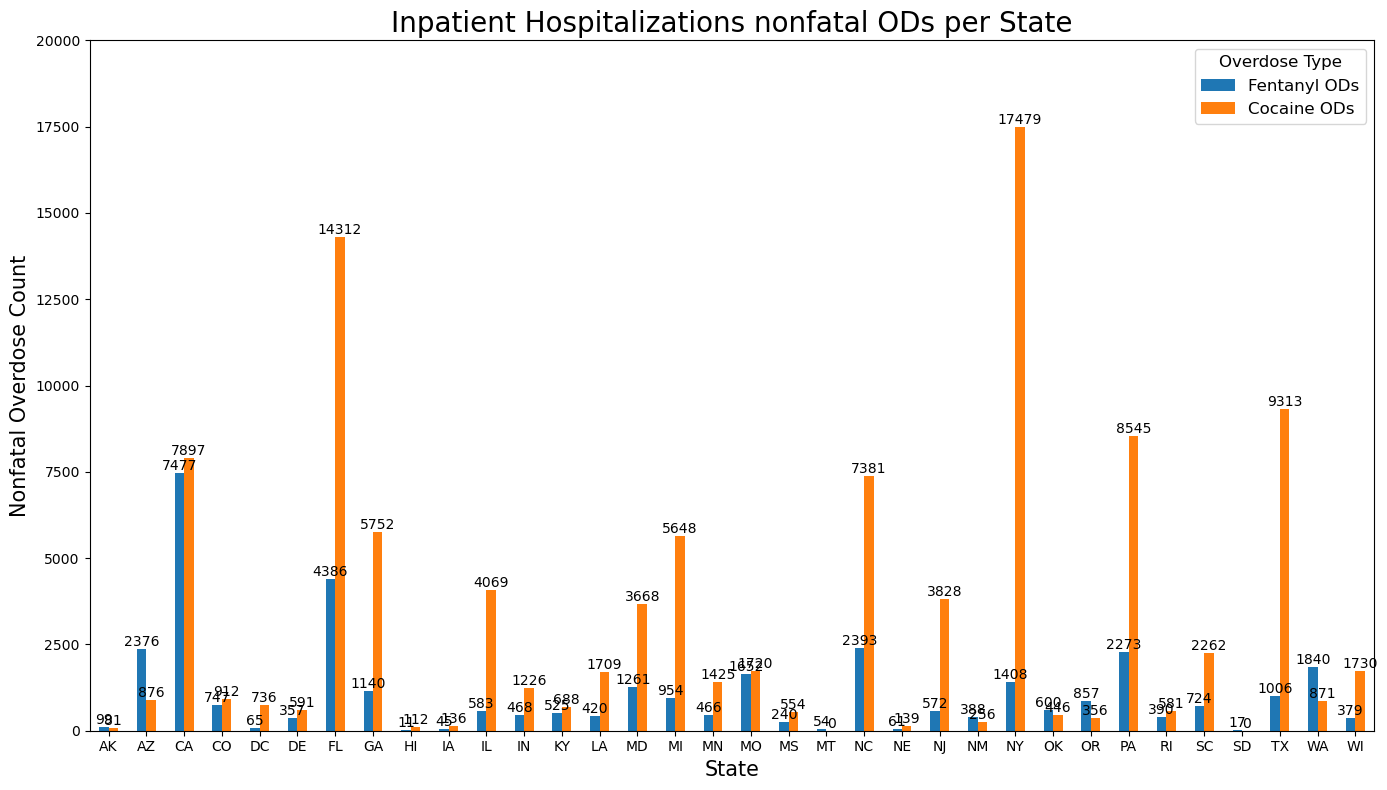

In [13]:

ax= yearly2018_2023hosp.plot(x='jurisdiction',y=['count_fentanyl','count_cocaine'], kind='bar',figsize=(14, 8))

for container in ax.containers:
    ax.bar_label(container, label_type='edge')
    
plt.title('Inpatient Hospitalizations nonfatal ODs per State', fontsize=20)
plt.xlabel('State',fontsize=15)
plt.ylabel('Nonfatal Overdose Count',fontsize=15)
plt.xticks(rotation= 0)
plt.legend((['Fentanyl ODs','Cocaine ODs']), title='Overdose Type', title_fontsize=12, fontsize=12)
plt.tight_layout()

plt.ylim(bottom=0, top=20000)

# Comparing Emergency Dept Vs Hospitalizations

## Cocaine OD Visits

In [16]:
cocaine_visits_count = (
    er_hospital_states
    .loc[er_hospital_states['jurisdiction']!= 'US']
    .groupby(['jurisdiction', 'dataset'])['count_cocaine'].sum().reset_index()
    
)
cocaine_visits_count

,jurisdiction,dataset,count_cocaine
0,AK,ED,0.0
1,AK,HOSP,81.0
2,AZ,ED,621.0
3,AZ,HOSP,1610.0
4,CA,ED,9952.0
...,...,...,...
59,TX,ED,5842.0
60,TX,HOSP,18626.0
61,WA,HOSP,1505.0
62,WI,ED,980.0


In [17]:
sorted_jurisdictions1 = (
    cocaine_visits_count
    .groupby('jurisdiction')['count_cocaine']
    .sum()
    .sort_values(ascending=False)
    .index
)

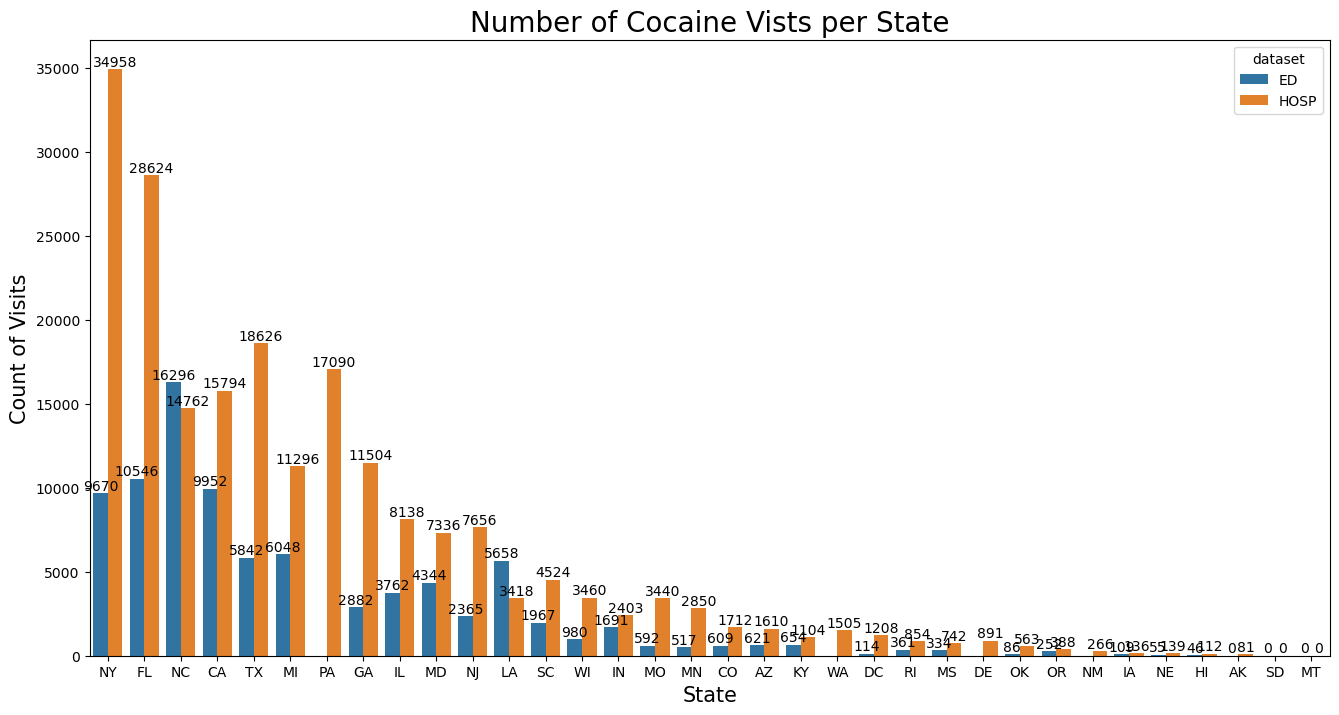

In [18]:
plt.figure(figsize=(16, 8))
ax = sns.barplot(
    x='jurisdiction',
    y='count_cocaine',
    hue='dataset',
    data=cocaine_visits_count,
    order=sorted_jurisdictions1
)
for container in ax.containers:
    ax.bar_label(container, label_type='edge')
plt.xlabel('State', fontsize=15)
plt.ylabel('Count of Visits', fontsize=15)
plt.title('Number of Cocaine Vists per State', fontsize=20)
plt.show()

## Fentanyl OD visits

In [20]:
fentanyl_visits_count = (
    er_hospital_states
    .loc[er_hospital_states['jurisdiction']!= 'US']
    .groupby(['jurisdiction', 'dataset'])['count_fentanyl'].sum().reset_index()
    
)
fentanyl_visits_count



,jurisdiction,dataset,count_fentanyl
0,AK,ED,451.0
1,AK,HOSP,133.0
2,AZ,ED,9842.0
3,AZ,HOSP,4865.0
4,CA,ED,41445.0
...,...,...,...
59,TX,ED,3934.0
60,TX,HOSP,1954.0
61,WA,HOSP,3640.0
62,WI,ED,670.0


In [21]:
sorted_jurisdictions = (
    fentanyl_visits_count
    .groupby('jurisdiction')['count_fentanyl']
    .sum()
    .sort_values(ascending=False)
    .index
)

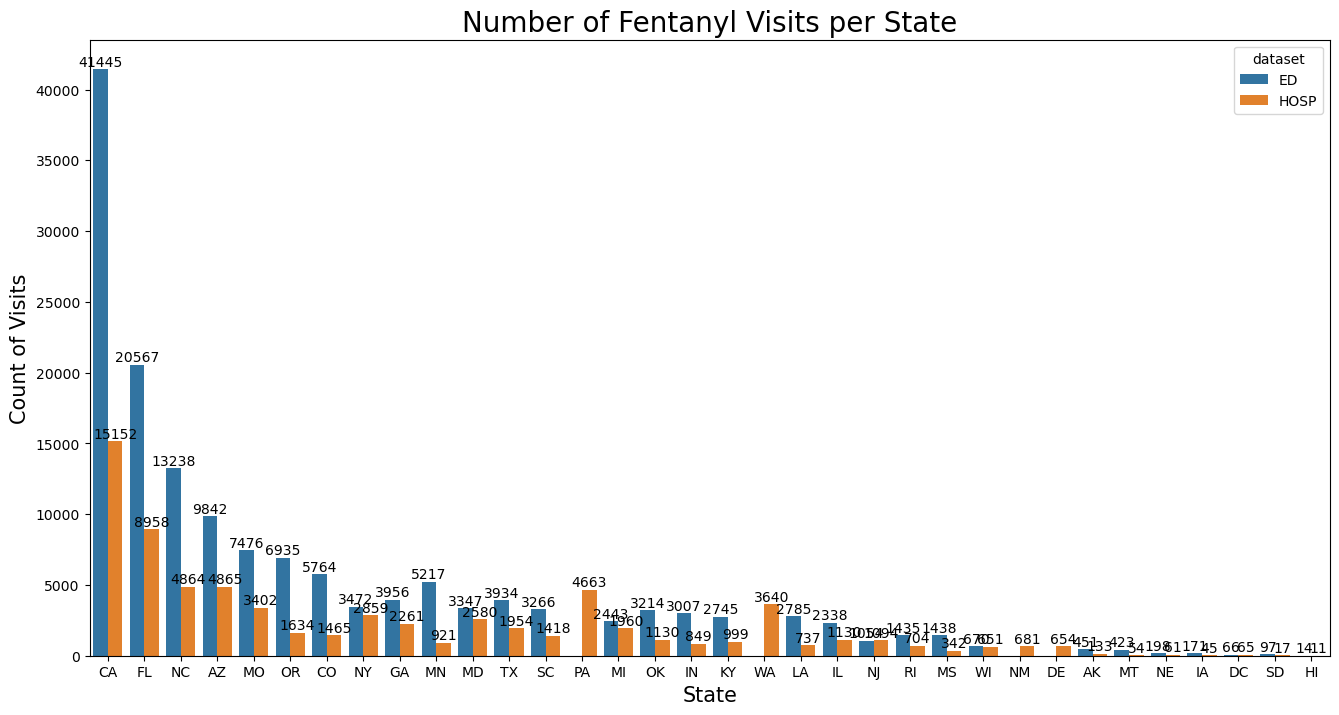

In [22]:
plt.figure(figsize=(16, 8))
ax = sns.barplot(
    x='jurisdiction',
    y='count_fentanyl',
    hue='dataset',
    data=fentanyl_visits_count,
    order=sorted_jurisdictions
)
for container in ax.containers:
    ax.bar_label(container, label_type='edge')
plt.xlabel('State', fontsize=15)
plt.ylabel('Count of Visits', fontsize=15)
plt.title('Number of Fentanyl Visits per State', fontsize=20)
plt.show()

## Count of overdose by year

In [24]:
annual_HOSP_visits = (
    er_hospital_states
    .loc[er_hospital_states['month'] == 'all']
    .loc[er_hospital_states['jurisdiction']!= 'US']
    .loc[er_hospital_states['dataset']=='HOSP']
    .groupby('year')[['count_fentanyl','count_cocaine']].sum().reset_index()
)
annual_HOSP_visits


,year,count_fentanyl,count_cocaine
0,2018,0.0,17258.0
1,2019,0.0,17978.0
2,2020,0.0,16596.0
3,2021,7406.0,17402.0
4,2022,10950.0,17316.0
5,2023,17878.0,18749.0


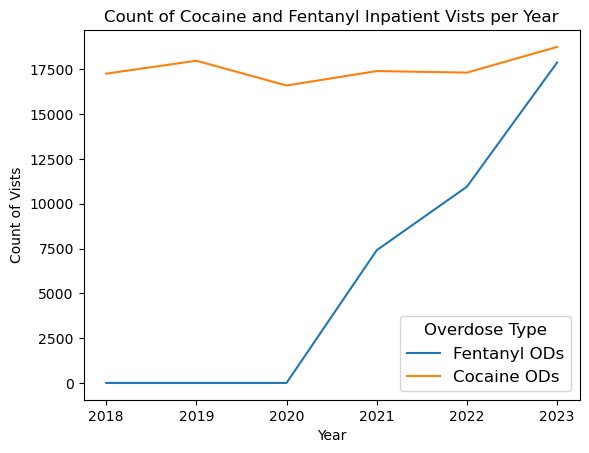

In [25]:
#set x-axis
annual_HOSP_visits= annual_HOSP_visits.set_index('year')
#set y-axis
annual_HOSP_visits.plot(y=['count_fentanyl','count_cocaine'])


plt.xlabel('Year')
plt.ylabel('Count of Vists')
plt.title('Count of Cocaine and Fentanyl Inpatient Vists per Year')
plt.legend((['Fentanyl ODs','Cocaine ODs']), title='Overdose Type', title_fontsize=12, fontsize=12)



In [26]:
annual_ED_visits = (
    er_hospital_states
    .loc[er_hospital_states['month'] == 'all']
    .loc[er_hospital_states['jurisdiction']!= 'US']
    .loc[er_hospital_states['dataset']=='ED']
    .groupby('year')[['count_fentanyl','count_cocaine']].sum().reset_index()
)
annual_ED_visits


,year,count_fentanyl,count_cocaine
0,2018,0.0,7125.0
1,2019,0.0,6791.0
2,2020,0.0,7034.0
3,2021,18766.0,7973.0
4,2022,24104.0,8430.0
5,2023,31565.0,7599.0


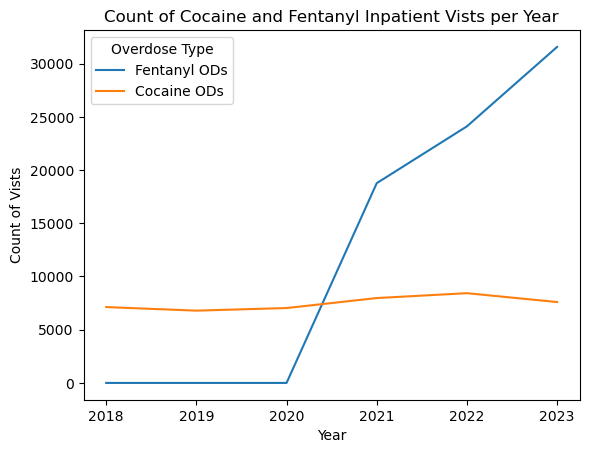

In [27]:
#set x-axis
annual_ED_visits= annual_ED_visits.set_index('year')
#set y-axis
annual_ED_visits.plot(y=['count_fentanyl','count_cocaine'])

plt.xlabel('Year')
plt.ylabel('Count of Vists')
plt.title('Count of Cocaine and Fentanyl Inpatient Vists per Year')
plt.legend((['Fentanyl ODs','Cocaine ODs']), title='Overdose Type', title_fontsize=10, fontsize=10)



## Count of overdoses by month

In [30]:
per_month = (
    er_hospital_states
    .loc[er_hospital_states['month']!='all']
    .groupby('month')[['count_cocaine','count_fentanyl']].sum().reset_index()
    
)

per_month

,month,count_cocaine,count_fentanyl
0,1,21359.0,14584.0
1,2,21045.0,14763.0
2,3,25730.0,17895.0
3,4,24303.0,17709.0
4,5,27199.0,19019.0
5,6,26365.0,19311.0
6,7,26932.0,20285.0
7,8,26571.0,20380.0
8,9,24580.0,19620.0
9,10,24160.0,22198.0


(0.0, 35000.0)

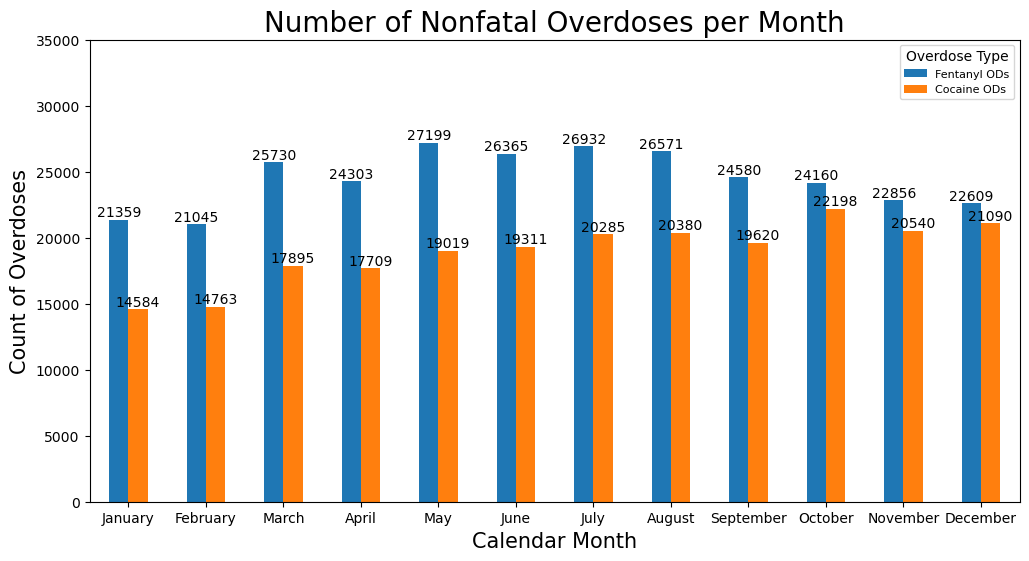

In [126]:
ax= per_month.plot(x='month', y= ['count_cocaine','count_fentanyl'], kind='bar', figsize=(12,6))

for container in ax.containers:
    ax.bar_label(container, label_type='edge')
plt.xlabel('Calendar Month', fontsize=15)
plt.ylabel('Count of Overdoses', fontsize=15)
plt.title('Number of Nonfatal Overdoses per Month', fontsize=20)
plt.legend((['Fentanyl ODs','Cocaine ODs']), title='Overdose Type', title_fontsize=10, fontsize=8)
plt.xticks([0,1,2,3,4,5,6,7,8,9,10,11], ['January','February','March','April','May','June','July','August','September','October','November','December'],rotation= 0)
plt.ylim(bottom=0, top=35000)

## Population analysis

In [33]:
coke_state_ods = er_hospital_states[
    (er_hospital_states['jurisdiction'] != 'US') &
    (er_hospital_states['month'] == 'all')
].copy()


In [34]:
fent_state_ods = er_hospital_states[
    (er_hospital_states['jurisdiction'] != 'US') &
    (er_hospital_states['month'] == 'all')
].copy()


In [35]:
cols_to_convert = [
    'population', 'count_cocaine'
]
for col in cols_to_convert:
    coke_state_ods[col] = pd.to_numeric(coke_state_ods[col], errors='coerce')
    


In [36]:
cols_to_convert2 = [
    'population', 'count_fentanyl'
]
for col in cols_to_convert:
    fent_state_ods[col] = pd.to_numeric(fent_state_ods[col], errors='coerce')
    


In [37]:
coke_state_ods = coke_state_ods.groupby(
    ['year', 'jurisdiction', 'population']
)['count_cocaine'].sum().reset_index()

In [38]:
fent_state_ods = fent_state_ods.groupby(
    ['year', 'jurisdiction', 'population']
)['count_fentanyl'].sum().reset_index()

In [39]:
coke_state_ods['cocaine_percent'] = (
    coke_state_ods['count_cocaine'] / coke_state_ods['population'] * 100
).round(2)

In [40]:
fent_state_ods['fentanyl_percent'] = (
    fent_state_ods['count_fentanyl'] / fent_state_ods['population'] * 100
).round(2)

In [41]:
collapsed = coke_state_ods.groupby('jurisdiction').agg({
    'year': list,
    'cocaine_percent': list
}).reset_index()

In [42]:
collapsed2 = fent_state_ods.groupby('jurisdiction').agg({
    'year': list,
    'fentanyl_percent': list
}).reset_index()

In [43]:
avg_cocaine_percent = coke_state_ods.groupby('jurisdiction')['cocaine_percent'].mean().reset_index()

In [44]:
avg_fentanyl_percent = fent_state_ods.groupby('jurisdiction')['fentanyl_percent'].mean().reset_index()

In [45]:
avg_cocaine_percent = avg_cocaine_percent.sort_values('cocaine_percent', ascending=False)

In [46]:
avg_fentanyl_percent = avg_fentanyl_percent.sort_values('fentanyl_percent', ascending=False)

In [128]:
avg_fentanyl_percent.head(5)

,jurisdiction,fentanyl_percent
26,OR,0.018333
28,RI,0.018333
1,AZ,0.016667
17,MO,0.015000
20,NC,0.013333


In [130]:
avg_cocaine_percent.head(5)

,jurisdiction,cocaine_percent
20,NC,0.023333
4,DC,0.020000
24,NY,0.020000
13,LA,0.015000
6,FL,0.015000


# Age group analysis

In [50]:
age_range_df = pd.read_excel('DOSE_dx_Dashboard_011325.xlsx',sheet_name='Overall by Sex & Age')
age_range_df

,jurisdiction,sex,age,month,year,time_frame,dataset,population,count_alldrug,count_opioid,...,count_methamphetamine,count_benzodiazepine,rate_alldrug,rate_opioid,rate_fentanyl,rate_heroin,rate_stimulant,rate_cocaine,rate_methamphetamine,rate_benzodiazepine
0,US,F,0-14,1,2018,monthly,ED,21721263,1754,49,...,NaN,56,8.1,0.2,NaN,0,0.3,suppressed,NaN,0.3
1,US,F,0-14,2,2018,monthly,ED,21721263,1652,53,...,NaN,61,7.6,0.2,NaN,suppressed,0.4,suppressed,NaN,0.3
2,US,F,0-14,3,2018,monthly,ED,21721263,1691,36,...,NaN,65,7.8,0.2,NaN,0,0.4,suppressed,NaN,0.3
3,US,F,0-14,4,2018,monthly,ED,21721263,1717,46,...,NaN,66,7.9,0.2,NaN,0,0.4,suppressed,NaN,0.3
4,US,F,0-14,5,2018,monthly,ED,21721263,1850,51,...,NaN,64,8.5,0.2,NaN,suppressed,0.3,suppressed,NaN,0.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1555,US,M,55+,9,2023,monthly,HOSP,38005604,2500,966,...,134,158,6.6,2.5,0.7,0.3,1.7,1.1,0.4,0.4
1556,US,M,55+,10,2023,monthly,HOSP,38005604,2524,978,...,114,148,6.6,2.6,0.7,0.3,1.7,1.2,0.3,0.4
1557,US,M,55+,11,2023,monthly,HOSP,38005604,2353,882,...,135,144,6.2,2.3,0.6,0.3,1.7,1.1,0.4,0.4
1558,US,M,55+,12,2023,monthly,HOSP,38005604,2370,844,...,126,148,6.2,2.2,0.6,0.3,1.7,1.1,0.3,0.4


In [51]:
age = (
    age_range_df
    .loc[age_range_df['month'] == 'all']
    [['sex', 'age', 'year','count_cocaine','count_fentanyl']]
)
age 

,sex,age,year,count_cocaine,count_fentanyl
12,F,0-14,2018,19,NaN
25,F,15-24,2018,372,NaN
38,F,25-34,2018,741,NaN
51,F,35-54,2018,973,NaN
64,F,55+,2018,344,NaN
...,...,...,...,...,...
1507,M,0-14,2023,81,226
1520,M,15-24,2023,416,1212
1533,M,25-34,2023,1748,3293
1546,M,35-54,2023,4827,4946


In [52]:
counts_by_age_group = (
    age
    .groupby('age')[['count_cocaine','count_fentanyl']].sum().reset_index()
)
counts_by_age_group

,age,count_cocaine,count_fentanyl
0,0-14,1000,1465
1,15-24,9658,15551
2,25-34,27819,37416
3,35-54,61463,40811
4,55+,50340,15323


## Female

In [54]:
female_age_group = (
    age
    .loc[age['sex'] == 'F']
    .groupby(['year','age'])[['count_cocaine','count_fentanyl']].sum()
)
female_age_group

count_cocaine count_fentanyl
year age                               
2018 0-14             43              0
     15-24           697              0
     25-34          1757              0
     35-54          3679              0
     55+            2269              0
2019 0-14             61              0
     15-24           608              0
     25-34          1598              0
     35-54          3912              0
     55+            2680              0
2020 0-14             66              0
     15-24           683              0
     25-34          1586              0
     35-54          3408              0
     55+            2403              0
2021 0-14             91            136
     15-24           568           1323
     25-34          1601           2653
     35-54          3560           2533
     55+            2733           1052
2022 0-14            111            206
     15-24           615           1705
     25-34          1641           3487
     35-54          3502           3657
     55+            2995           1499
2023 0-14            105            318
     15-24           541           2164
     25-34          1578           4522
     35-54          3589           5639
     55+            3090           2281

## Male

In [56]:
male_age_group = (
    age
    .loc[age['sex'] == 'M']
    .groupby(['year','age'])[['count_cocaine','count_fentanyl']].sum()
)
male_age_group

count_cocaine count_fentanyl
year age                               
2018 0-14             68              0
     15-24          1198              0
     25-34          3164              0
     35-54          6547              0
     55+            4981              0
2019 0-14             50              0
     15-24          1092              0
     25-34          2838              0
     35-54          6541              0
     55+            5396              0
2020 0-14             64              0
     15-24          1022              0
     25-34          2967              0
     35-54          6176              0
     55+            5276              0
2021 0-14            103            172
     15-24           958           2851
     25-34          3064           6848
     35-54          6778           6500
     55+            5906           2115
2022 0-14             99            260
     15-24           871           3450
     25-34          3034           8571
     35-54          6842           9076
     55+            6049           3124
2023 0-14            139            373
     15-24           805           4058
     25-34          2991          11335
     35-54          6929          13406
     55+            6562           5252

# Overdose Death Analysis

In [146]:
filepath = '../data/VSRR_Provisional_Drug_Overdose_Death_Counts.csv'
od_deaths_df = pd.read_csv(filepath)
od_deaths_df

,State,Year,Month,Period,Indicator,Data Value,Percent Complete,Percent Pending Investigation,State Name,Footnote,Footnote Symbol,Predicted Value
0,AK,2015,April,12 month-ending,"Synthetic opioids, excl. methadone (T40.4)",NaN,100.0,0.000000,Alaska,Numbers may differ from published reports usin...,**,NaN
1,AK,2015,April,12 month-ending,"Natural & semi-synthetic opioids, incl. methad...",NaN,100.0,0.000000,Alaska,Numbers may differ from published reports usin...,**,NaN
2,AK,2015,April,12 month-ending,Percent with drugs specified,88.0952381,100.0,0.000000,Alaska,Numbers may differ from published reports usin...,**,NaN
3,AK,2015,April,12 month-ending,Cocaine (T40.5),NaN,100.0,0.000000,Alaska,Numbers may differ from published reports usin...,**,NaN
4,AK,2015,April,12 month-ending,Number of Deaths,"4,133",100.0,0.000000,Alaska,Numbers may differ from published reports usin...,**,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
70324,YC,2024,September,12 month-ending,Cocaine (T40.5),"1,321",100.0,0.567389,New York City,Underreported due to incomplete data.,*,"1,388"
70325,YC,2024,September,12 month-ending,Psychostimulants with abuse potential (T43.6),227,100.0,0.567389,New York City,Underreported due to incomplete data.,*,237
70326,YC,2024,September,12 month-ending,Heroin (T40.1),444,100.0,0.567389,New York City,Underreported due to incomplete data.,*,459
70327,YC,2024,September,12 month-ending,Number of Drug Overdose Deaths,"2,451",100.0,0.567389,New York City,Underreported due to incomplete data.,*,"2,552"


In [151]:
od_deaths_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70329 entries, 0 to 70328
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   State                          70329 non-null  object 
 1   Year                           70329 non-null  int64  
 2   Month                          70329 non-null  object 
 3   Period                         70329 non-null  object 
 4   Indicator                      70329 non-null  object 
 5   Data Value                     59363 non-null  object 
 6   Percent Complete               70329 non-null  float64
 7   Percent Pending Investigation  70329 non-null  float64
 8   State Name                     70329 non-null  object 
 9   Footnote                       70329 non-null  object 
 10  Footnote Symbol                70329 non-null  object 
 11  Predicted Value                47153 non-null  object 
dtypes: float64(2), int64(1), object(9)
memory usag

In [169]:
deaths_fent_coke = (
    od_deaths_df
    .loc[(od_deaths_df['Indicator']=='Synthetic opioids, excl. methadone (T40.4)') | (od_deaths_df['Indicator']=='Cocaine (T40.5)')]
)
deaths_fent_coke

,State,Year,Month,Period,Indicator,Data Value,Percent Complete,Percent Pending Investigation,State Name,Footnote,Footnote Symbol,Predicted Value
0,AK,2015,April,12 month-ending,"Synthetic opioids, excl. methadone (T40.4)",NaN,100.0,0.000000,Alaska,Numbers may differ from published reports usin...,**,NaN
3,AK,2015,April,12 month-ending,Cocaine (T40.5),NaN,100.0,0.000000,Alaska,Numbers may differ from published reports usin...,**,NaN
13,AK,2015,August,12 month-ending,Cocaine (T40.5),NaN,100.0,0.000000,Alaska,Numbers may differ from published reports usin...,**,NaN
17,AK,2015,August,12 month-ending,"Synthetic opioids, excl. methadone (T40.4)",NaN,100.0,0.000000,Alaska,Numbers may differ from published reports usin...,**,NaN
26,AK,2015,December,12 month-ending,Cocaine (T40.5),NaN,100.0,0.000000,Alaska,Numbers may differ from published reports usin...,**,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
70304,YC,2024,November,12 month-ending,"Synthetic opioids, excl. methadone (T40.4)",NaN,100.0,1.194127,New York City,Underreported due to incomplete data. Data no...,*,"1,664"
70311,YC,2024,October,12 month-ending,Cocaine (T40.5),"1,234",100.0,0.781068,New York City,Underreported due to incomplete data.,*,"1,314"
70315,YC,2024,October,12 month-ending,"Synthetic opioids, excl. methadone (T40.4)","1,678",100.0,0.781068,New York City,Underreported due to incomplete data.,*,"1,770"
70324,YC,2024,September,12 month-ending,Cocaine (T40.5),"1,321",100.0,0.567389,New York City,Underreported due to incomplete data.,*,"1,388"


In [221]:
deaths_fent_coke['Data Value'] = pd.to_numeric(deaths_fent_coke['Data Value'], errors = 'coerce')

C:\Users\rinad\AppData\Local\Temp\ipykernel_22812\844080778.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  deaths_fent_coke['Data Value'] = pd.to_numeric(deaths_fent_coke['Data Value'], errors = 'coerce')


In [223]:
years2018_2023 = (
    deaths_fent_coke
    .loc[(deaths_fent_coke['Year'] >= 2018) & (deaths_fent_coke['Year'] <= 2023)]
)
years2018_2023.head(5)

,State,Year,Month,Period,Indicator,Data Value,Percent Complete,Percent Pending Investigation,State Name,Footnote,Footnote Symbol,Predicted Value
434,AK,2018,April,12 month-ending,Cocaine (T40.5),15.0,100.0,0.0,Alaska,Numbers may differ from published reports usin...,**,16
441,AK,2018,April,12 month-ending,"Synthetic opioids, excl. methadone (T40.4)",38.0,100.0,0.0,Alaska,Numbers may differ from published reports usin...,**,39
444,AK,2018,August,12 month-ending,Cocaine (T40.5),NaN,100.0,0.0,Alaska,Numbers may differ from published reports usin...,**,NaN
455,AK,2018,August,12 month-ending,"Synthetic opioids, excl. methadone (T40.4)",19.0,100.0,0.0,Alaska,Numbers may differ from published reports usin...,**,20
456,AK,2018,December,12 month-ending,Cocaine (T40.5),10.0,100.0,0.0,Alaska,Numbers may differ from published reports usin...,**,11


In [241]:
coke_per_state = (
    years2018_2023
    .loc[years2018_2023['Indicator'] == 'Cocaine (T40.5)']
    .loc[years2018_2023['State Name'] != 'United States']
    .groupby('State Name')['Data Value'].sum().reset_index()
    .sort_values(by='Data Value',ascending=False)
)
coke_per_state

,State Name,Data Value
18,Maryland,49946.0
42,Virginia,42334.0
38,Tennessee,36361.0
27,New Jersey,34696.0
29,New York,34221.0
19,Massachusetts,33037.0
45,Wisconsin,32980.0
6,Connecticut,32610.0
30,New York City,30102.0
9,Georgia,28650.0


In [243]:
fent_per_state = (
    years2018_2023
    .loc[years2018_2023['Indicator'] == 'Synthetic opioids, excl. methadone (T40.4)']
    .loc[years2018_2023['State Name'] != 'United States']
    .groupby('State Name')['Data Value'].sum().reset_index()
    .sort_values(by='Data Value',ascending=False)
)
fent_per_state

,State Name,Data Value
17,Maine,28068.0
28,New Mexico,26412.0
26,New Hampshire,26320.0
7,Delaware,26152.0
21,Minnesota,25638.0
5,Colorado,24180.0
8,District of Columbia,23960.0
25,Nevada,21640.0
44,West Virginia,21335.0
16,Kentucky,20976.0


In [249]:
deaths_per_year= (
    years2018_2023
    .loc[years2018_2023['State Name'] != 'United States']
    .groupby(['Year','Indicator'])['Data Value'].sum().reset_index()
)
deaths_per_year

,Year,Indicator,Data Value
0,2018,Cocaine (T40.5),99170.0
1,2018,"Synthetic opioids, excl. methadone (T40.4)",103731.0
2,2019,Cocaine (T40.5),126207.0
3,2019,"Synthetic opioids, excl. methadone (T40.4)",129871.0
4,2020,Cocaine (T40.5),136386.0
5,2020,"Synthetic opioids, excl. methadone (T40.4)",94668.0
6,2021,Cocaine (T40.5),117183.0
7,2021,"Synthetic opioids, excl. methadone (T40.4)",83430.0
8,2022,Cocaine (T40.5),112894.0
9,2022,"Synthetic opioids, excl. methadone (T40.4)",103469.0


In [259]:
cokedeaths_per_month= (
    years2018_2023
    .loc[years2018_2023['Indicator'] == 'Cocaine (T40.5)']
    .loc[years2018_2023['State Name'] != 'United States']
    .groupby('Month')['Data Value'].sum().reset_index()
    .sort_values(by='Data Value',ascending=False)
)
cokedeaths_per_month

,Month,Data Value
6,June,60192.0
2,December,59693.0
7,March,59527.0
5,July,59406.0
1,August,59270.0
8,May,59040.0
11,September,58591.0
3,February,58476.0
0,April,58393.0
9,November,58090.0


In [261]:
fentdeaths_per_month= (
    years2018_2023
    .loc[years2018_2023['Indicator'] == 'Synthetic opioids, excl. methadone (T40.4)']
    .loc[years2018_2023['State Name'] != 'United States']
    .groupby('Month')['Data Value'].sum().reset_index()
    .sort_values(by='Data Value',ascending=False)
)
fentdeaths_per_month

,Month,Data Value
10,October,53090.0
9,November,52934.0
1,August,52495.0
2,December,51893.0
3,February,50965.0
11,September,50656.0
5,July,50009.0
8,May,49598.0
7,March,49376.0
4,January,48840.0


In [225]:
years2018_2023.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6912 entries, 434 to 70192
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   State                          6912 non-null   object 
 1   Year                           6912 non-null   int64  
 2   Month                          6912 non-null   object 
 3   Period                         6912 non-null   object 
 4   Indicator                      6912 non-null   object 
 5   Data Value                     4281 non-null   float64
 6   Percent Complete               6912 non-null   float64
 7   Percent Pending Investigation  6912 non-null   float64
 8   State Name                     6912 non-null   object 
 9   Footnote                       6912 non-null   object 
 10  Footnote Symbol                6912 non-null   object 
 11  Predicted Value                6069 non-null   object 
dtypes: float64(3), int64(1), object(8)
memory usage: 7